In [1]:
function f(x)
    return (x-1)*(x+3)^2
end

function f_deriv(f, x; h=1e-5)
    return (f(x + h) - f(x - h)) / (2h)
end

function f_deriv_2(f, x; h=1e-5)
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h^2)
end

f_deriv_2 (generic function with 1 method)

In [2]:
a = -1
b = 2
acc = 0.001

0.001

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


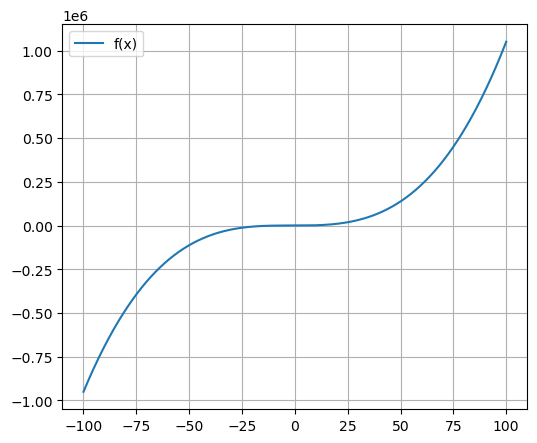

In [3]:
using PyPlot

x_vals = -100:0.1:100
y_vals = f.(x_vals)

PyPlot.figure(figsize=(6, 5))
PyPlot.plot(x_vals, y_vals, label="f(x)")
PyPlot.grid()
PyPlot.legend()
PyPlot.show()

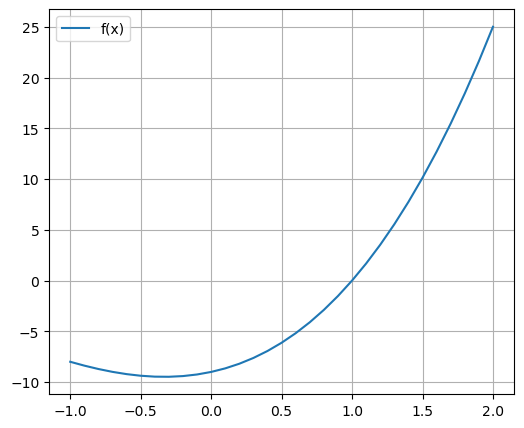

In [4]:
using PyPlot

x_vals = a:0.1:1b
y_vals = f.(x_vals)

PyPlot.figure(figsize=(6, 5))
PyPlot.plot(x_vals, y_vals, label="f(x)")
PyPlot.grid()
PyPlot.legend()
PyPlot.show()

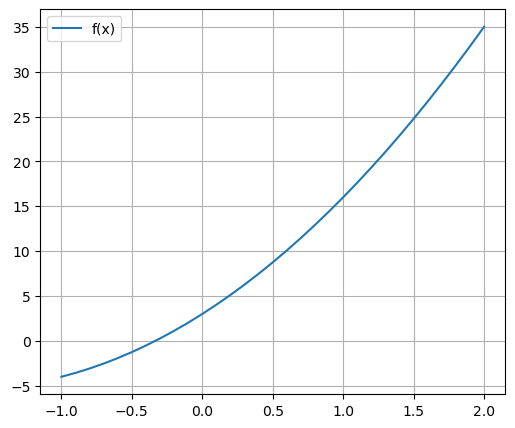

In [5]:
x_vals = a:0.1:1b
derivative_values = [f_deriv(f, x) for x in x_vals]

PyPlot.figure(figsize=(6, 5))
PyPlot.plot(x_vals, derivative_values, label="f(x)")
PyPlot.grid()
PyPlot.legend()
PyPlot.show()

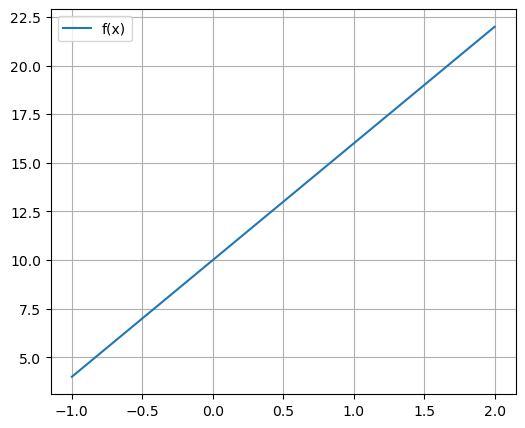

In [6]:
x_vals = a:0.1:1b
derivative_2_values = [f_deriv_2(f, x) for x in x_vals]

PyPlot.figure(figsize=(6, 5))
PyPlot.plot(x_vals, derivative_2_values, label="f(x)")
PyPlot.grid()
PyPlot.legend()
PyPlot.show()

In [7]:
function is_unimodal_1(f, a, b, n)
    step=(b-a)/n
    x_values = a:step:b
    derivative_values = [f_deriv(f, x) for x in x_values]

    for i in 1:(length(derivative_values) - 1)
        if derivative_values[i] > derivative_values[i + 1]
            return false
        end
    end
    return true
end

println("Функиця унимодальна по теореме 1: ",is_unimodal_1(f,a,b,1000))

function is_unimodal_2(f, a, b, n)
    step=(b-a)/n
    x_values = a:step:b
    for x in x_values
        if f_deriv_2(f,x) < 0
            return false
        end
    end
    return true
end

print("Функиця унимодальна по теореме 2: ",is_unimodal_2(f,a,b,1000))

function find_l(f, a, b, n)
    step=(b-a)/n
    x_values = a:step:b
    derivative_values = [f_deriv(f, x) for x in x_values]

    maxVal = -100000
    for i in 1:(length(derivative_values) - 1)
        if derivative_values[i] > maxVal
            maxVal=derivative_values[i]
        end
    end
    
    return maxVal
end



L=find_l(f,a,b,1000)

Функиця унимодальна по теореме 1: true
Функиця унимодальна по теореме 2: true

34.934027000410595

In [112]:
function find_unimodal_intervals(f, a, b, n)
    step = (b - a) / n
    rng = a:step:b
    intervals = []
    l = a
    for x in rng
        if x == a
            continue
        end
        d1_prev = f_deriv(f, x - step)
        d1 = f_deriv(f, x)
        d2 = f_deriv_2(f, x)
        if (d2 >= 0) && (d1_prev > d1)
            push!(intervals, (l, x - step))
            l = x
        end
    end
    if length(intervals) == 0
        return [(a, b)]
    end

    return intervals
end

intervals_uni = find_unimodal_intervals(f, a, b, 1000)
println("intervals_uni", intervals_uni[end])

intervals_uni(-1, 2)


In [8]:
function search(f, a, b, epsilon)
    h = epsilon
    n = Int(floor((b - a) / h))
    x_values = [a + i * h for i in 0:n]
    f_values = f.(x_values)

    intervals = [(x_values[i], x_values[i + 1]) for i in 1:n]

    f_min, idx = findmin(f_values)
    x_min = x_values[idx]

    return x_min, f_min, length(x_values), intervals
end

search (generic function with 1 method)

x = -0.33299999999999996
y = -9.481481036999998
iters_count = 3001


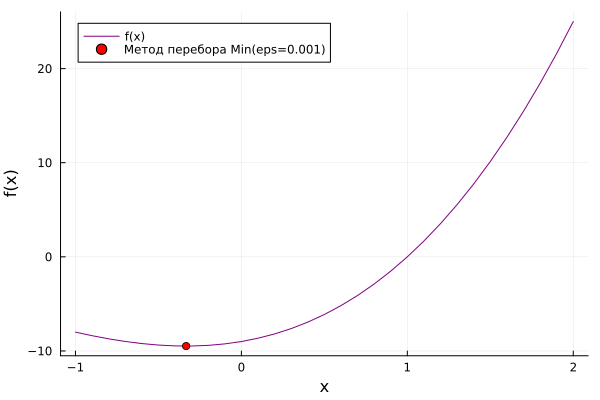

In [9]:
using Plots

x_search, y_search, iters_search, intervals = search(f, a, b, acc) 

println("x = ",x_search)
println("y = ",y_search)
println("iters_count = ",iters_search)

xs = a:0.1:b
ys = f.(xs)

plt1 = Plots.plot(xs, ys, label="f(x)", xlabel="x", ylabel="f(x)", color=:purple)
    
scatter!([x_search], [y_search], label="Метод перебора Min(eps=$acc)", color=:red)
Plots.plot!()

In [109]:
function bisection(f, a, b, eps)
    a_pogr = a
    b_pogr = b
    a = Float64(a)
    b = Float64(b)
    intervals = [(a,b)]
    iters = 0
    delta = eps / 10

    while b - a > eps
        iters += 1
        m = (a + b) / 2
        
        if f(m - delta) < f(m + delta)
            b = m
        else
            a = m
        end
        
        push!(intervals, (a, b))
    end
    
    min = (a + b) / 2
    pogr = L*(b-a)/2
    return min, f(min), iters,pogr, intervals
end

bisection (generic function with 1 method)

x = -0.3331298828125
y = -9.481481315904603
кол-во итераций: 12
Близость |fx-f| <= 0.012793222778470677


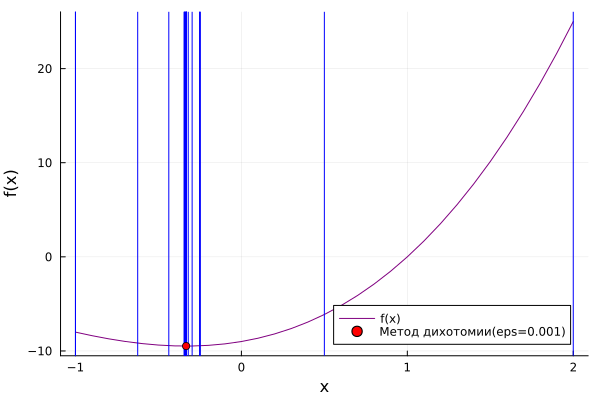

In [110]:
using Plots

x_bisection, y_bisection, iters_bisection, pogr_bisection, intervals_bisection = bisection(f, a, b, acc) 

println("x = ",x_bisection)
println("y = ",y_bisection)
println("кол-во итераций: ", iters_bisection)
println("Близость |fx-f| <= ",pogr_bisection)

xs = a:0.1:b
ys = f.(xs)

plt2 = Plots.plot(xs, ys, label="f(x)", xlabel="x", ylabel="f(x)", color=:purple)

for (i, interval) in enumerate(intervals_bisection)
    vline!([interval[1], interval[2]], color=:blue, label="")
end
    
scatter!([x_bisection], [y_bisection], label="Метод дихотомии(eps=$acc)", color=:red)

Plots.plot!()

In [100]:
function golden_section_f(f, a, b, eps)
    k = (sqrt(5)-1)/2  # ≈ 0.618
    a_initial = Float64(a)
    b_initial = Float64(b)
    intervals = [(a_initial, b_initial)]
    iters = 0
    
    x1 = a + (1 - k)*(b - a)
    x2 = a + k*(b - a)
    f1 = f(x1)
    f2 = f(x2)
    
    while (b - a) > eps
        iters += 1
        if f1 < f2
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + (1 - k)*(b - a)
            f1 = f(x1)
        else
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + k*(b - a)
            f2 = f(x2)
        end
        push!(intervals, (a, b))
    end
    
    min = (a + b)/2
    pogr = L*(b-a)/2
    return min, f(min),iters, pogr, intervals
end

golden_section_f (generic function with 1 method)

x = -0.3335614927390589
y = -9.481481273266501
кол-во итераций: 17
Близость |fx-f| <= 0.014674051080263787


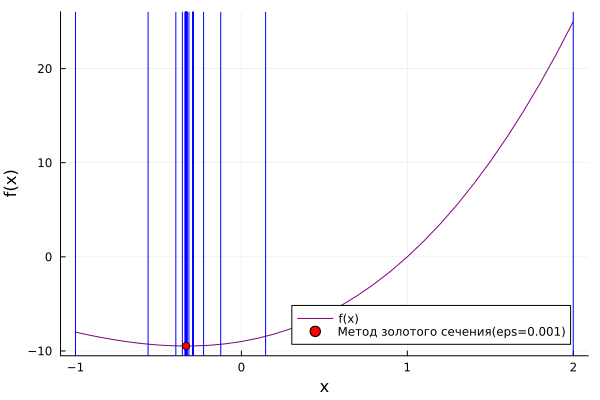

In [101]:
using Plots

x_golden, y_golden, iters_golden, pogr_golden, intervals_golden = golden_section(f, a, b, acc) 

println("x = ",x_golden)
println("y = ",y_golden)
println("кол-во итераций: ", iters_golden)
println("Близость |fx-f| <= ",pogr_golden)

xs = a:0.1:b
ys = f.(xs)

plt3=Plots.plot(xs, ys, label="f(x)", xlabel="x", ylabel="f(x)", color=:purple)


for (i, interval) in enumerate(intervals_golden)
    vline!([interval[1], interval[2]], color=:blue, label="")
end

scatter!([x_golden], [y_golden], label="Метод золотого сечения(eps=$acc)", color=:red)

Plots.plot!()

In [104]:
function fibonacci_search(f, a, b, eps)
    a = float(a)
    b = float(b)
    
    F = [1, 1]
    while F[end] < (b - a) / eps
        push!(F, F[end] + F[end-1])
    end
    n = length(F)

    intervals = [(a, b)]

    x1 = a + (F[n-2] / F[n]) * (b - a)
    x2 = a + (F[n-1] / F[n]) * (b - a)
    f1 = f(x1)
    f2 = f(x2)

    for k in 1:(n - 2)
        if f1 > f2
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + (F[n - k - 1] / F[n - k]) * (b - a)
            f2 = f(x2)
        else
            b = x2
            x2 = x1
            f2 = f1
            if (n - k - 2) < 1
                x1 = a
            else
                x1 = a + (F[n - k - 2] / F[n - k]) * (b - a)
            end
            f1 = f(x1)
        end
        push!(intervals, (a, b))
        if k == n-2
            n=n-2
        end    
    end

    x_minimum = (a + b) / 2
    y_minimum = f(x_minimum)
    iters_fibonacci = n - 2
    pogr = L*(b-a)/2

    return x_minimum, y_minimum,iters_fibonacci,pogr,intervals
end

fibonacci_search (generic function with 1 method)

x = -0.33377182492226737
y = -9.481480712466299
кол-во итераций: 15
Близость |fx-f| <= 0.01253313573322496


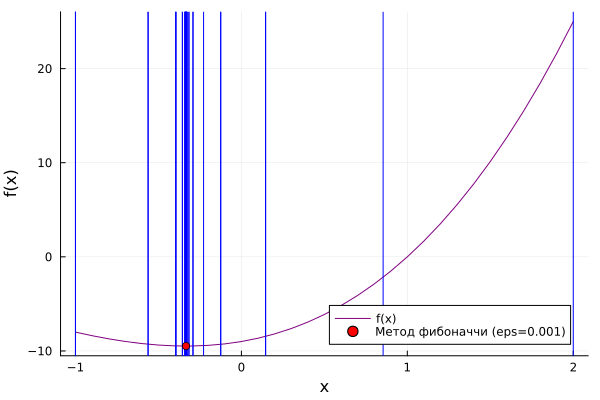

In [105]:
using Plots

x_fibonacci, y_fibonacci, iter_fibonacci, pogr_fibonacci, intervals_fibonacci = fibonacci_search(f, a, b, acc)

println("x = ",x_fibonacci)
println("y = ",y_fibonacci)
println("кол-во итераций: ", iter_fibonacci)
println("Близость |fx-f| <= ",pogr_fibonacci)

xs = a:0.1:b
ys = f.(xs)

plt4=Plots.plot(xs, ys, label="f(x)", xlabel="x", ylabel="f(x)", color=:purple)

for (i, interval) in enumerate(intervals_fibonacci)
    vline!([interval[1], interval[2]], color=:blue, label="")
end
    
scatter!([x_fibonacci], [y_fibonacci], label="Метод фибоначчи (eps=$acc)", color=:red)

Plots.plot!()

x = -0.33299999999999996
y = -9.481481036999998
кол-во итераций: 3001


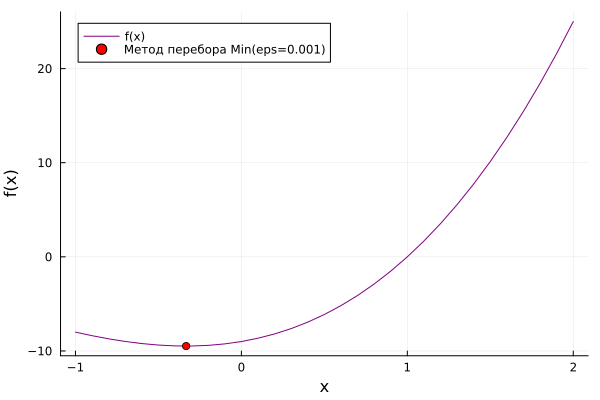

x = -0.3331298828125
y = -9.481481315904603
кол-во итераций: 12
Близость |fx-f| <= 0.012793222778470677


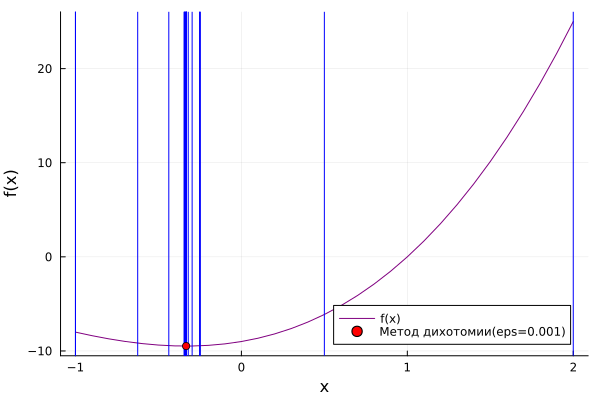

x = -0.3335614927390589
y = -9.481481273266501
кол-во итераций: 17
Близость |fx-f| <= 0.014674051080263787


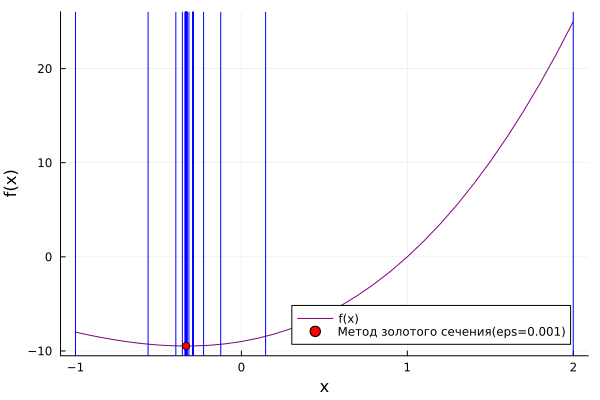

x = -0.33377182492226737
y = -9.481480712466299
кол-во итераций: 15
Близость |fx-f| <= 0.01253313573322496


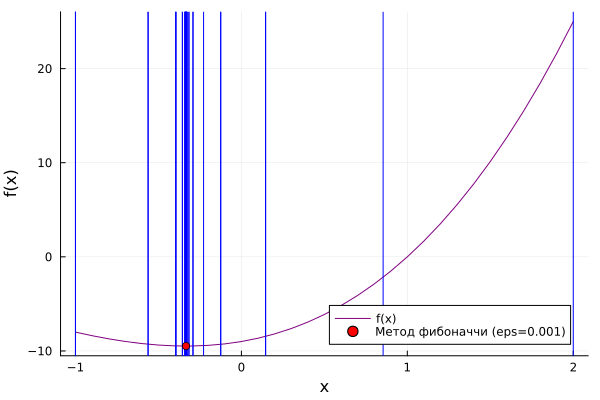

In [111]:
println("x = ",x_search)
println("y = ",y_search)
println("кол-во итераций: ",iters_search)
display(plt1)


println("x = ",x_bisection)
println("y = ",y_bisection)
println("кол-во итераций: ", iters_bisection)
println("Близость |fx-f| <= ",pogr_bisection)
display(plt2)

println("x = ",x_golden)
println("y = ",y_golden)
println("кол-во итераций: ", iters_golden)
println("Близость |fx-f| <= ",pogr_golden)
display(plt3)

println("x = ",x_fibonacci)
println("y = ",y_fibonacci)
println("кол-во итераций: ", iter_fibonacci)
println("Близость |fx-f| <= ",pogr_fibonacci)
display(plt4)